In [1]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt


# Creating train and test data in ratio: 160:40
weight = 0.3
bias = 0.1

x = torch.arange(0, 1, 0.005).unsqueeze(dim=1)
y = weight * x + bias

x_train, y_train = x[:160], y[:160]
x_test, y_test = x[160:], y[160:]

# Creating function for ploting data and optional ploting for predictions
def plot_data(predictions=None):
    plt.figure(figsize=(11, 7))

    plt.scatter(x_train, y_train, c="g", s=3, label="Train data")
    plt.scatter(x_test, y_test, c="y", s=3, label="Test data")

    if predictions is not None:
        plt.scatter(x_test, predictions, c="r", s=3, label="Prediction data")

    plt.legend(prop={"size": 14});


In [2]:
class LinearRegresionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_layer = nn.Linear(in_features=1, out_features=1)
        # self.weights = nn.Parameter(torch.rand(1))
        # self.bias = nn.Parameter(torch.rand(1))
    def forward(self, x):
            return self.linear_layer(x)

In [3]:
torch.manual_seed(128)

model_v1 = LinearRegresionModel()
print(model_v1.state_dict())
print(f"Original weight: {weight} | Original bias: {bias}")

optimizer = torch.optim.SGD(params=model_v1.parameters(), lr=0.01)
loss_fn = nn.L1Loss()

OrderedDict([('linear_layer.weight', tensor([[0.7182]])), ('linear_layer.bias', tensor([-0.2862]))])
Original weight: 0.3 | Original bias: 0.1


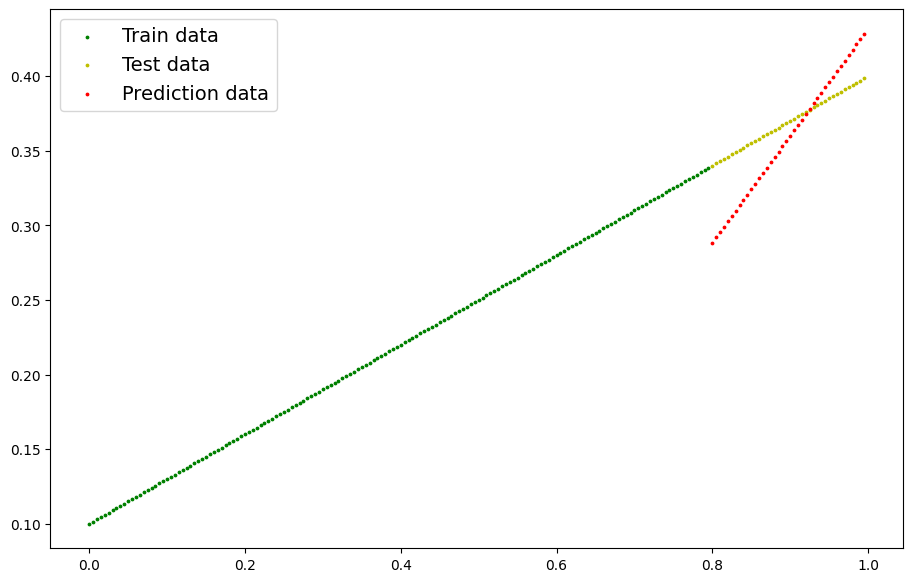

In [4]:
with torch.inference_mode():
    y_predicition = model_v1(x_test)

plot_data(predictions=y_predicition)

In [5]:
epochs=295

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_v1.train()
    y_predicition = model_v1(x_train)
    loss = loss_fn(y_predicition, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_v1.eval()
    with torch.inference_mode():
        test_pred = model_v1(x_test)
        test_loss = loss_fn(test_pred, y_test)

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
        print(f"Model parameters values: {model_v1.state_dict()}\n")


Epoch: 0 | Loss: 0.22002454102039337 | Test loss: 0.021185483783483505
Model parameters values: OrderedDict([('linear_layer.weight', tensor([[0.7221]])), ('linear_layer.bias', tensor([-0.2762]))])

Epoch: 10 | Loss: 0.1280193030834198 | Test loss: 0.11618802696466446
Model parameters values: OrderedDict([('linear_layer.weight', tensor([[0.7520]])), ('linear_layer.bias', tensor([-0.1895]))])

Epoch: 20 | Loss: 0.10267120599746704 | Test loss: 0.16609199345111847
Model parameters values: OrderedDict([('linear_layer.weight', tensor([[0.7553]])), ('linear_layer.bias', tensor([-0.1425]))])

Epoch: 30 | Loss: 0.09399360418319702 | Test loss: 0.18629273772239685
Model parameters values: OrderedDict([('linear_layer.weight', tensor([[0.7475]])), ('linear_layer.bias', tensor([-0.1154]))])

Epoch: 40 | Loss: 0.08920010179281235 | Test loss: 0.19282017648220062
Model parameters values: OrderedDict([('linear_layer.weight', tensor([[0.7352]])), ('linear_layer.bias', tensor([-0.0977]))])

Epoch: 50 |

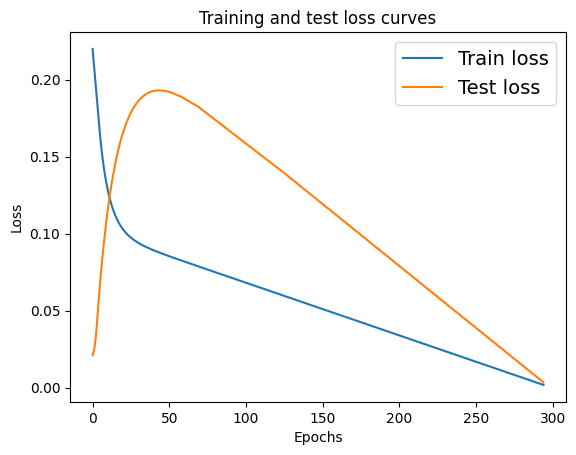

In [6]:
# Plotting loss curves
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(prop={"size": 14});

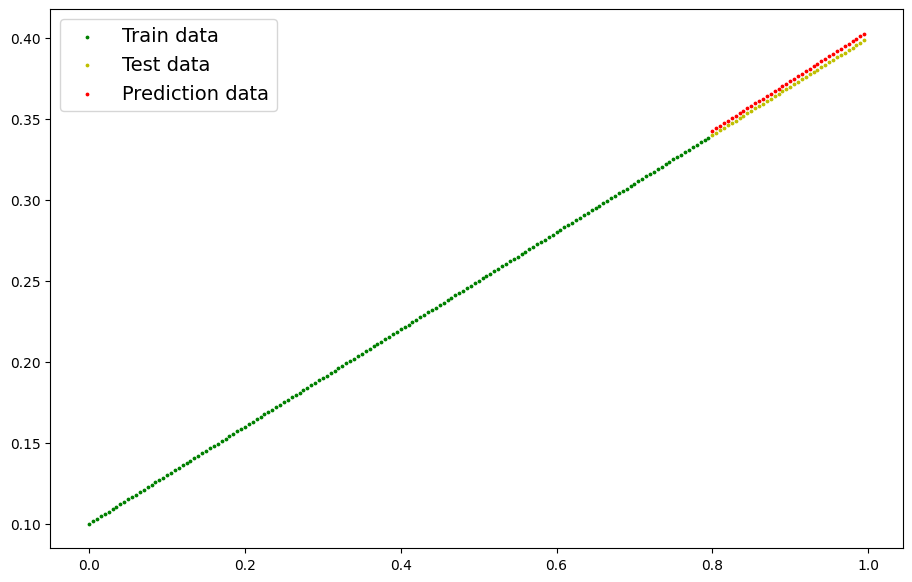

In [7]:
model_v1.eval()

with torch.inference_mode():
    y_predicition = model_v1(x_test)

plot_data(predictions=y_predicition)

In [8]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model_01.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_v1.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/model_01.pt
